In [1]:
## NEXRAD gridding example

In [1]:
import pyart
import boto3
import pydda

from botocore.handlers import disable_signing
%pylab inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/rjackson/.local/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/rjackson/.local/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rjackson/anaconda3/envs/pyart-2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
conn = boto3.resource('s3')
conn.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket = conn.Bucket('noaa-nexrad-level2')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:16:01.854000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [10]:
max_items = 0
key_list = []
for item in bucket.objects.filter(Prefix='2019/05/17/KLOT/'):
    print(item.key)
    key_list.append(key_list)
    max_items += 1

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:01:56.043000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


2019/05/17/KLOT/KLOT20190517_000000_V06
2019/05/17/KLOT/KLOT20190517_000000_V06_MDM
2019/05/17/KLOT/KLOT20190517_000113_V06
2019/05/17/KLOT/KLOT20190517_000453_V06
2019/05/17/KLOT/KLOT20190517_000845_V06
2019/05/17/KLOT/KLOT20190517_001232_V06
2019/05/17/KLOT/KLOT20190517_001619_V06
2019/05/17/KLOT/KLOT20190517_002001_V06
2019/05/17/KLOT/KLOT20190517_002343_V06
2019/05/17/KLOT/KLOT20190517_002737_V06
2019/05/17/KLOT/KLOT20190517_003120_V06
2019/05/17/KLOT/KLOT20190517_003516_V06
2019/05/17/KLOT/KLOT20190517_003916_V06
2019/05/17/KLOT/KLOT20190517_004326_V06
2019/05/17/KLOT/KLOT20190517_004721_V06
2019/05/17/KLOT/KLOT20190517_005136_V06
2019/05/17/KLOT/KLOT20190517_005546_V06
2019/05/17/KLOT/KLOT20190517_005546_V06_MDM
2019/05/17/KLOT/KLOT20190517_010007_V06
2019/05/17/KLOT/KLOT20190517_010416_V06
2019/05/17/KLOT/KLOT20190517_010848_V06
2019/05/17/KLOT/KLOT20190517_011309_V06
2019/05/17/KLOT/KLOT20190517_011733_V06
2019/05/17/KLOT/KLOT20190517_012159_V06
2019/05/17/KLOT/KLOT20190517_012

In [11]:
bucket.download_file('2019/05/17/KLOT/KLOT20190517_054846_V06', 'KLOT20190517_054846')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:03:33.037000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [3]:
radar = pyart.io.read('KLOT20190517_054846')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:16:06.486000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (8280,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (8280,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (8280, 1832)>
		units: degrees
		standard_name: differential_phase_hv
		long_name: differential_phase_hv
		valid_max: 360.0
		valid_min: 0.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	differential_reflectivity:
		data: <nd

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:16:07.552000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [15]:
ref = radar.fields["reflectivity"]

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:05:35.954000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
radar.range["data"]

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:17:12.167000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


array([  2125.,   2375.,   2625., ..., 459375., 459625., 459875.],
      dtype=float32)

In [6]:
display = pyart.graph.RadarMapDisplay(radar)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:17:13.250000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:18:20.262000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pyart\graph\radarmapdisplay.py:268: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  UserWarning)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', D

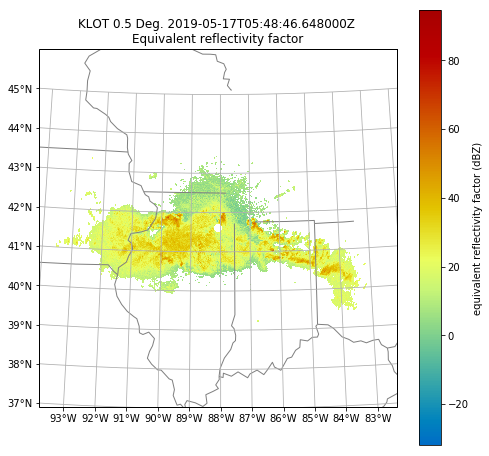

In [9]:
plt.figure(figsize=(8,8))
display.plot_ppi_map('reflectivity', sweep=0)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:37:20.115000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


(41, 43)

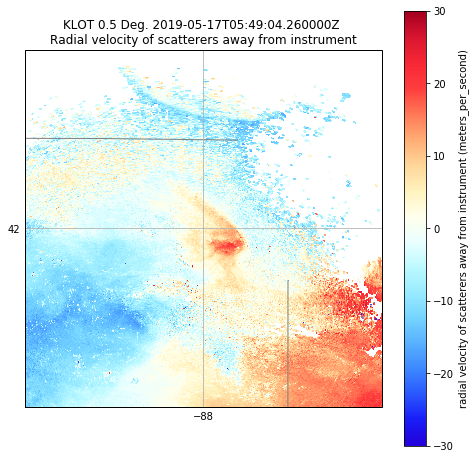

In [22]:
import cartopy.crs as ccrs
plt.figure(figsize=(8,8))
display.plot_ppi_map('velocity', sweep=1, projection=ccrs.PlateCarree(), vmin=-30, vmax=30)
plt.xlim([-89, -87])
plt.ylim([41, 43])

In [29]:
vel_texture = pyart.retrieve.calculate_velocity_texture(radar)
radar.add_field('velocity_texture', vel_texture)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:41:24.324000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pyart\util\sigmath.py:62: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(-2 * np.log(norm)) * (half_width) / np.pi


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:46:23.519000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


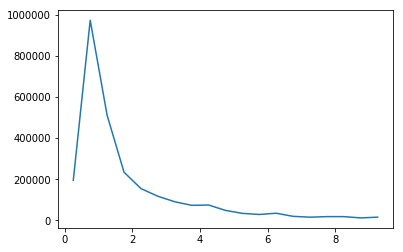

In [40]:
hist, bins = np.histogram(vel_texture["data"][vel_texture["data"] > 0.1], 
                          bins=np.arange(0, 10, 0.5))
bins = (bins[1:]+bins[:-1])/2.0
plt.plot(bins, hist)

In [47]:
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_above('velocity_texture', 2.5)
gatefilter = pyart.correct.despeckle_field(radar, 'reflectivity', gatefilter=gatefilter)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 13:50:46.580000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pyart\filters\gatefilter.py:635: RuntimeWarning: invalid value encountered in greater
  marked = self._get_fdata(field) > value


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:39:59.699000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


(41, 43)

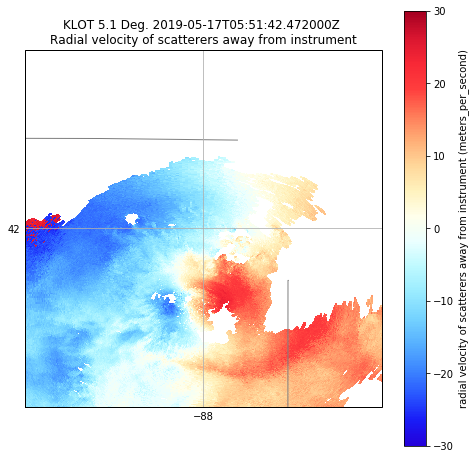

In [84]:
plt.figure(figsize=(8,8))
display.plot_ppi_map('velocity', sweep=10, projection=ccrs.PlateCarree(), vmin=-30, vmax=30,
                    gatefilter=gatefilter)
display.ax.coastlines()
plt.xlim([-89, -87])
plt.ylim([41, 43])

In [86]:
corrected_vel = pyart.correct.dealias_region_based(radar, gatefilter=gatefilter)
radar.add_field('corrected_velocity', corrected_vel)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:42:07.861000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pyart\correct\region_dealias.py:302: UserWarning: Velocities outside of the Nyquist interval found in sweep 12.
  warnings.warn(msg, UserWarning)


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:46:08.632000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


(-200, 200)

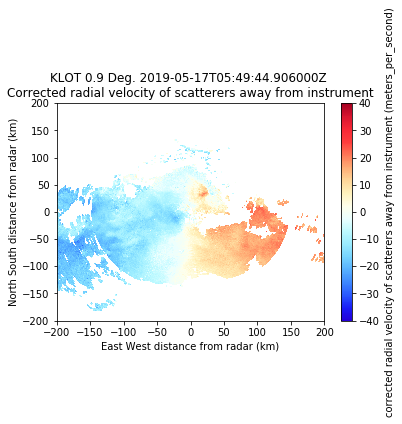

In [97]:
display.plot_ppi('corrected_velocity', sweep=3, vmin=-40, vmax=40)
plt.xlim([-200,200])
plt.ylim([-200,200])

In [98]:
grid_mhx = pyart.map.grid_from_radars(radar,(31,101,101),
                   ((0.,15000.),(-100000.,100000.),(-100000.,100000.)),
                   fields=['reflectivity','corrected_velocity'],
                   refl_field='reflectivity',roi_func='dist_beam',
                   h_factor=0.,nb=0.6,bsp=1.,min_radius=500.,
                   grid_origin=(radar.latitude['data'], radar.longitude['data']),
                   gatefilter=gatefilter
                   )

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:46:26.386000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pyart\map\gates_to_grid.py:177: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:46:30.689000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


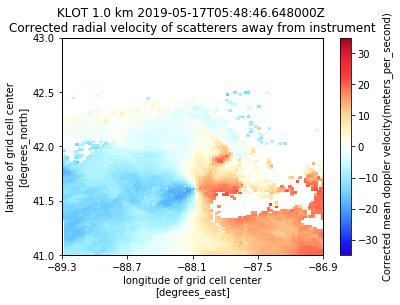

In [99]:
display_grid = pyart.graph.GridMapDisplay(grid_mhx)
display_grid.plot_grid('corrected_velocity', level=2, vmin=-35, vmax=35)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:47:06.254000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


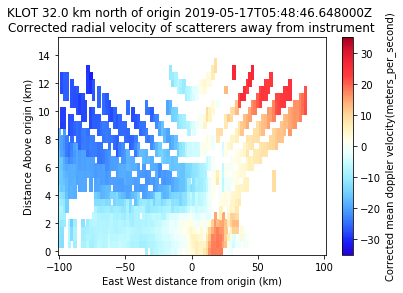

In [101]:
display_grid.plot_latitude_slice('corrected_velocity', lat=41.9, vmin=-35, vmax=35)

In [2]:
grid_mhx.write('KLOT_Grid.nc')

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 14:52:49.678000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


NameError: name 'grid_mhx' is not defined

In [2]:
grid_mhx = pyart.io.read_grid('KLOT_Grid.nc')

In [5]:
grid_mhx = pydda.constraints.make_constraint_from_era_interim(grid_mhx)

Download ERA Interim data...
2019-05-17 15:25:49 ECMWF API python library 1.5.0
2019-05-17 15:25:49 ECMWF API at https://api.ecmwf.int/v1
2019-05-17 15:25:49 Welcome Robert Jackson
2019-05-17 15:25:49 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web-API+Troubleshooting or contact servicedesk@ecmwf.int. In case of delays, please check  service activity page https://apps.ecmwf.int/webapi-activity/
2019-05-17 15:25:50 Request submitted
2019-05-17 15:25:50 Request id: 5cdf18d32fd81cfd9aa547c9
2019-05-17 15:25:50 Request is submitted
2019-05-17 15:25:51 Request is queued
Calling 'nice mars /tmp/46/7c/tmp-_marsolu6Ku.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
PPDIR is /var/tmp/ppdir/x86_64
mars - INFO   - 20190517.202656 - Welcome to MARS
mars - INFO

APIException: 'ecmwf.API error 1: ERROR 3 (MARS_RESTRICTED_ACCESS_TO_VALID_DATA): restricted access to valid data.'

In [20]:
u_init, v_init, w_init = pydda.initialization.make_constant_wind_field(grid_mhx,
                                                                       wind=(0.,0.,0.))

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 15:13:41.019000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [21]:
new_grid = pydda.retrieval.get_dd_wind_field([grid_mhx], u_init, v_init, w_init)

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 15:13:41.915000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\pydda\retrieval\angles.py:24: RuntimeWarning: invalid value encountered in arccos
  elev = np.arccos((Re**2 + slantrsq - rh**2)/(2 * Re * slantr))


Starting solver 
rmsVR = 151.54531050295805
Total points:130832.0
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  
|   3.8908|  12.0073|   0.0000|   0.0000|   0.0000|   0.0000|  16.6387
Norm of gradient: 0.0015421663642896312
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  
|   2.2505|  11.5540|   0.0000|   0.0000|   0.0000|   0.0000|  19.4903
Norm of gradient: 0.002761852810474862
Iterations before filter: 20
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  
|   2.2438|   9.6101|   0.0000|   0.0000|   0.0000|   0.0000|  25.7861
Norm of gradient: 0.0022372368488465396
Iterations before filter: 30
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  
|   2.2438|   9.6101|   0.0000|   0.0000|   0.0000|   0.0000|  25.7861
Norm of gradient: 0.0022372368488465396
Iterations before filter: 40
Applying low pass filter to wind field...
Iterations after filter: 1
Iterations after filter: 2
Don

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 15:13:42.715000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


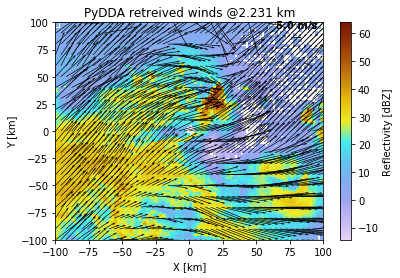

In [22]:
pydda.vis.plot_horiz_xsection_quiver(new_grid, level=4, quiver_spacing_x_km=5.0,
                                     quiverkey_loc='top_right')

In [16]:
pydda.vis.plot_horiz_xsection_quiver?

C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 15:10:30.277000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


C:\Users\rjackson\AppData\Local\Continuum\Anaconda2\envs\pyart-2018\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2019-05-17 15:15:25.969000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


ModuleNotFoundError: No module named 'ecmwfapi'